In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import metpy

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [86]:
from pyproj import Proj

def geostationary_indices_to_latlon(x_index, y_index):
    # Define the projection parameters for Meteosat MSG
    proj_params = {
        'proj': 'geos',
        'h': 35785831,  # Height of satellite in meters
        'lon_0': 0,  # Center longitude of projection
        'sweep': 'x',
        'ellps': 'GRS80'  # Ellipsoid used
    }

    # Initialize the Lambert Conformal Conic projection
    proj = Proj(proj_params)

    # Convert geostationary indices to coordinates in meters
    x_meters = x_index * 3000  # MSG has a 3 km spatial resolution
    y_meters = y_index * 3000

    # Convert meters to latitudes and longitudes
    lon, lat = proj(x_meters, y_meters, inverse=True)

    return lat, lon

# Example usage:
x_index = 1000  # Example x index
y_index = 500  # Example y index

latitude, longitude = geostationary_indices_to_latlon(x_index, y_index)
print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: 14.099860226117833
Longitude: 30.02089811663588


In [ ]:
# For the moment I have created a directory /prj/nflics/SSA_data but plan to create a separate archive once CCS tell me how to pay for it.
# The MSG window is defined by
# nx=2268,ny=2080,x1=320,y1=638 (y1 is southernmost row, x1 is easternmost column)

In [110]:
geostationary_indices_to_latlon(638, 320)

(8.810160061665776, 17.894909426804542)

In [39]:
#old_locs           
lpath = '/home/ck/DIR/cornkle/data/nflics/geoloc/lat_lon_2268_2080.npz'
msg_latlon = np.load(lpath)
mlon = msg_latlon['lon']
mlat = msg_latlon['lat']

In [43]:
mlon.shape

(2080, 2268)

In [54]:
llon0 = mlon[:,0]
np.max(llon0[llon0>-500])

-20.37385

In [59]:
llon1 = mlon[:,-1]
np.min(llon1[llon1>-500])

50.723347

In [60]:
llat0 = mlat[0,:]
np.max(llat0[llat0>-500])

-36.767998

In [72]:
llat0 = mlat[-1,:]
np.min(llat0[llat0>-500])

24.504892

In [112]:
## a clean way of plotting - use matplotlib functions directly:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
def draw_map(ax, data, lon, lat, title=None,  mask_sig=None, quiver=None, contour=None, cbar_label=None, **kwargs):

    mapp = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), **kwargs)  # this is the actual plot
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.contourf(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
    ## additional contour on plot   
    if contour is not None:
        ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], cmap=contour['cmap'] )
        
    
    ax.coastlines()   ## adds coastlines
    # Gridlines
    xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
    xl.xlabels_top = False   ## labels off
    xl.ylabels_right = False
    plt.title(title)
    # Countries
 #   ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
    cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label)

In [113]:
mlat.shape

(2080, 2268)

In [114]:
lats.shape

(2107, 2520)

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/crs.py:414: RuntimeWarning: invalid value encountered in remainder
  x[to_180] = (((x[to_180] + 180) % 360) - 180)
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


(-45.0, 30.0)

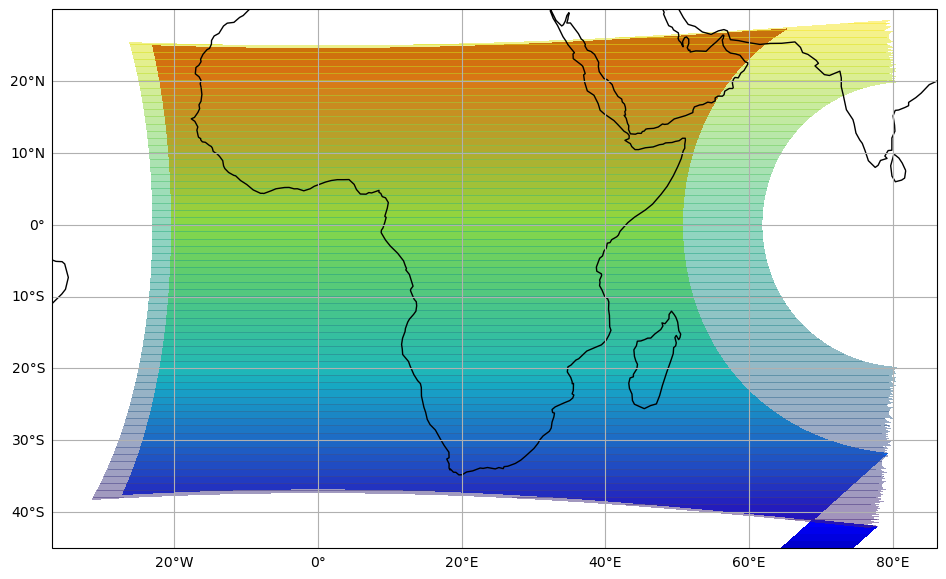

In [111]:
f=plt.figure(figsize=(15,7))  # this opens a plot window
ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
ax.contourf(mlon, mlat, mlat, transform=ccrs.PlateCarree(), cmap='jet', levels=np.arange(-50,30,1))
ax.contourf(lons, lats, lats, transform=ccrs.PlateCarree(), levels=np.arange(-50,30,1), alpha=0.5, cmap='viridis')
ax.coastlines()   ## adds coastlines
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
#   ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
cbar = plt.colorbar(mapp)  # adds colorbar
ax.set_ylim(-45,30)

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/crs.py:414: RuntimeWarning: invalid value encountered in remainder
  x[to_180] = (((x[to_180] + 180) % 360) - 180)
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


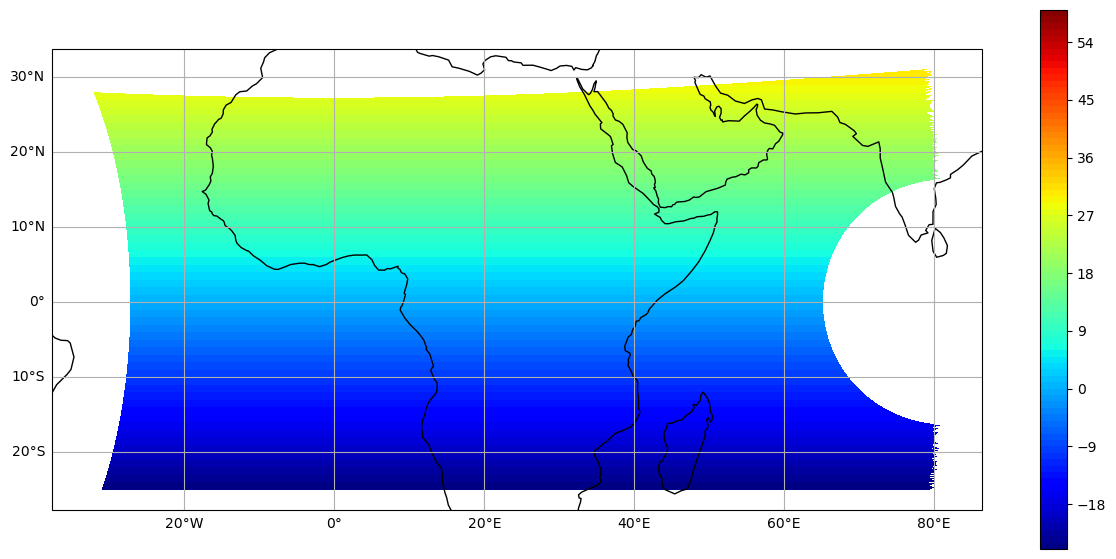

In [77]:
f=plt.figure(figsize=(15,7))  # this opens a plot window
ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
draw_map(ax, lats, lons, lats, cmap='jet', levels=np.arange(-25,60,1))

In [122]:
msg_file = '/home/ck/DIR/cornkle/data/EUMDAC_MSG_TESTS/HRSEVIRI_20240130T090010Z_20240130T091243Z_epct_f1ffc12e_FC.nc' #HRSEVIRI_20240130T093010Z_20240130T094243Z_epct_e27dc2f7_FC.nc' #Chris box

In [123]:
msg = xr.open_dataset(msg_file)

In [124]:
dat = msg.metpy.parse_cf(['channel_1'])

In [125]:
dat.x.shape

(2267,)

In [126]:
dat.y.shape

(2079,)

In [127]:
dat['channel_1'].shape

(2079, 2267)

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


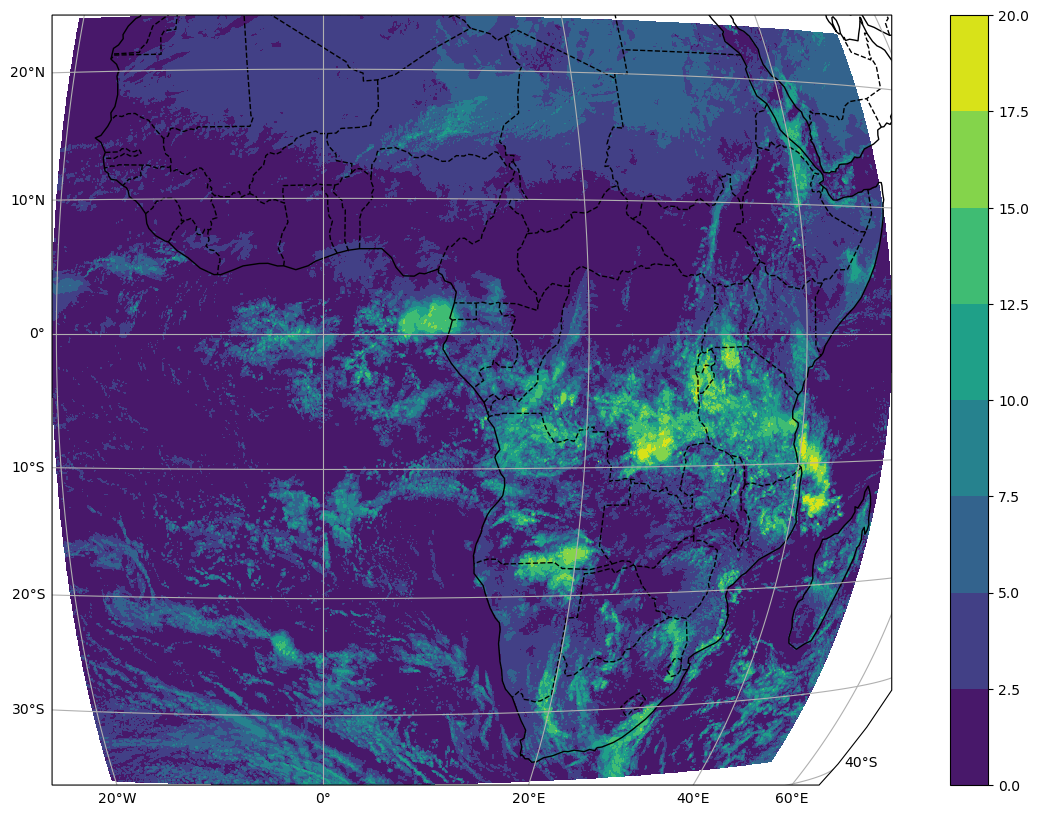

In [128]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.Geostationary())
plt.contourf(dat.x, dat.y, dat['channel_1'], transform=ccrs.Geostationary())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()

In [129]:
from pyproj import Proj
p = Proj(proj='geos', h='35786023.0', lon_0='0', sweep='x')

cord_grid = np.meshgrid(dat['x'].values, dat['y'].values)
lons, lats = p(cord_grid[0], cord_grid[1], inverse=True)

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/crs.py:414: RuntimeWarning: invalid value encountered in remainder
  x[to_180] = (((x[to_180] + 180) % 360) - 180)
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


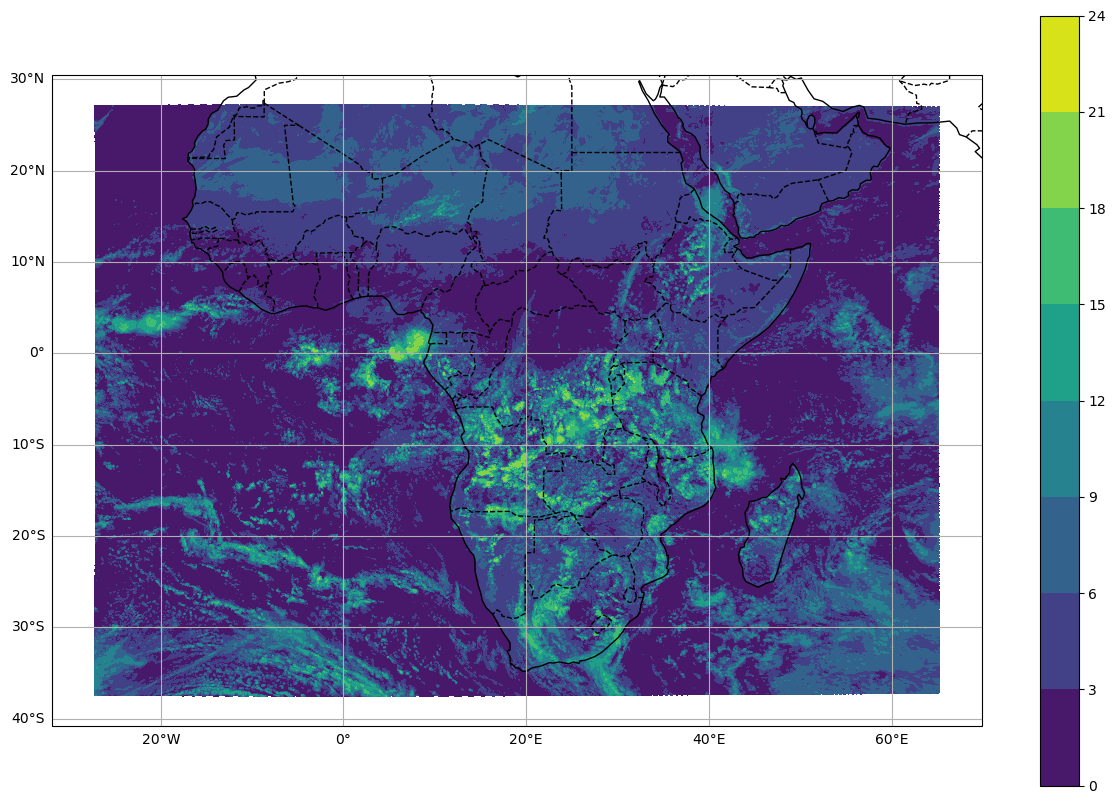

In [70]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(lons, lats, dat['channel_1'], transform=ccrs.PlateCarree())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()

In [29]:
print(np.nanmax(lats[np.isfinite(lats)]))
print(np.nanmin(lats[np.isfinite(lats)]))

28.424603904446805
-42.136086687875256


In [30]:
print(np.nanmax(lons[np.isfinite(lons)]))
print(np.nanmin(lons[np.isfinite(lons)]))

80.52751675988979
-31.39742997346947


In [ ]:
lats